# About BMW Used Car Prediction


***Estimating the value of a used car is one of the main everyday challenges in automotive business. We believe that the sales price of a car is not only based on the value of the product itself, but is also heavily influenced by things like market trends and current availability.***

***Data consists of almost 5000 real BMW cars that were sold via a b2b auction in 2018. The price in the data is the highest bid that was reached during the auction. Criteria have been labeled feature_1 to feature_8 in dataset.***

***File includes all the Required Data Analysis with supportive Data Visualization. Also, commenting has been made at code cell.***

***Deep Learning ANN approach is used with potential focus on R-Squared value and Data Insights as per the Problem Statement Demand.***



## Import Libraries

In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set_style('whitegrid')
import os
%matplotlib inline 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score
from sklearn.metrics import r2_score

## Load Dataset

In [9]:
data = pd.read_csv('bmw_pricing_challenge.csv')

In [10]:
data.head()

,maker_key,model_key,mileage,engine_power,registration_date,fuel,paint_color,car_type,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,price,sold_at
0,BMW,118,140411,100,2012-02-01,diesel,black,convertible,True,True,False,False,True,True,True,False,11300,2018-01-01
1,BMW,M4,13929,317,2016-04-01,petrol,grey,convertible,True,True,False,False,False,True,True,True,69700,2018-02-01
2,BMW,320,183297,120,2012-04-01,diesel,white,convertible,False,False,False,False,True,False,True,False,10200,2018-02-01
3,BMW,420,128035,135,2014-07-01,diesel,red,convertible,True,True,False,False,True,True,True,True,25100,2018-02-01
4,BMW,425,97097,160,2014-12-01,diesel,silver,convertible,True,True,False,False,False,True,True,True,33400,2018-04-01


In [6]:
# Data contains 4843 rows and 18 columns 
data.shape

In [12]:
#No missing values in any of the columns 
data.isnull().sum()

maker_key            0
model_key            0
mileage              0
engine_power         0
registration_date    0
fuel                 0
paint_color          0
car_type             0
feature_1            0
feature_2            0
feature_3            0
feature_4            0
feature_5            0
feature_6            0
feature_7            0
feature_8            0
price                0
sold_at              0
dtype: int64

In [13]:
# The range of price variable is pretty large but most of the cars sold lie between 10,000 to 19000 price range 
#The minimum value  of mileage does not makes sense .Inter quartile for mileage is 100,000 to 175,000
# In engine we have sold cars having no engine to have 423HP cars 

data.describe()

,mileage,engine_power,price
count,4.843000e+03,4843.00000,4843.000000
mean,1.409628e+05,128.98823,15828.081767
std,6.019674e+04,38.99336,9220.285684
min,-6.400000e+01,0.00000,100.000000
25%,1.029135e+05,100.00000,10800.000000
50%,1.410800e+05,120.00000,14200.000000
75%,1.751955e+05,135.00000,18600.000000
max,1.000376e+06,423.00000,178500.000000


In [14]:
#Checking the Data types for each column 
data.dtypes

maker_key            object
model_key            object
mileage               int64
engine_power          int64
registration_date    object
fuel                 object
paint_color          object
car_type             object
feature_1              bool
feature_2              bool
feature_3              bool
feature_4              bool
feature_5              bool
feature_6              bool
feature_7              bool
feature_8              bool
price                 int64
sold_at              object
dtype: object

In [15]:
# All data types correct apart from sold_at and registration_data they need to be datatime 

data['registration_date']=pd.to_datetime(data['registration_date'])
data['sold_at']=pd.to_datetime(data['sold_at'])


In [16]:
data[data['mileage']<0]

,maker_key,model_key,mileage,engine_power,registration_date,fuel,paint_color,car_type,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,price,sold_at
2938,BMW,640 Gran Coupé,-64,230,2017-03-01,diesel,black,sedan,True,True,False,True,False,False,True,True,75000,2018-04-01


In [17]:
#correcting the mileage value 

data.set_value(2938, 'mileage', 64)


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  This is separate from the ipykernel package so we can avoid doing imports until


,maker_key,model_key,mileage,engine_power,registration_date,fuel,paint_color,car_type,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,price,sold_at
0,BMW,118,140411,100,2012-02-01,diesel,black,convertible,True,True,False,False,True,True,True,False,11300,2018-01-01
1,BMW,M4,13929,317,2016-04-01,petrol,grey,convertible,True,True,False,False,False,True,True,True,69700,2018-02-01
2,BMW,320,183297,120,2012-04-01,diesel,white,convertible,False,False,False,False,True,False,True,False,10200,2018-02-01
3,BMW,420,128035,135,2014-07-01,diesel,red,convertible,True,True,False,False,True,True,True,True,25100,2018-02-01
4,BMW,425,97097,160,2014-12-01,diesel,silver,convertible,True,True,False,False,False,True,True,True,33400,2018-04-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4838,BMW,218 Gran Tourer,39743,110,2015-10-01,diesel,black,van,False,True,False,False,False,False,True,False,14600,2018-08-01
4839,BMW,218 Active Tourer,49832,100,2015-06-01,diesel,grey,van,False,True,False,False,False,False,True,True,17500,2018-08-01
4840,BMW,218 Gran Tourer,19633,110,2015-10-01,diesel,grey,van,False,True,False,False,False,False,True,True,17000,2018-09-01
4841,BMW,218 Active Tourer,27920,110,2016-04-01,diesel,brown,van,True,True,False,False,False,False,True,True,22700,2018-09-01


In [18]:
data[data['mileage']==64]

,maker_key,model_key,mileage,engine_power,registration_date,fuel,paint_color,car_type,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,price,sold_at
2938,BMW,640 Gran Coupé,64,230,2017-03-01,diesel,black,sedan,True,True,False,True,False,False,True,True,75000,2018-04-01


## Explonatory analysis on dataset so as to know the dataset better 




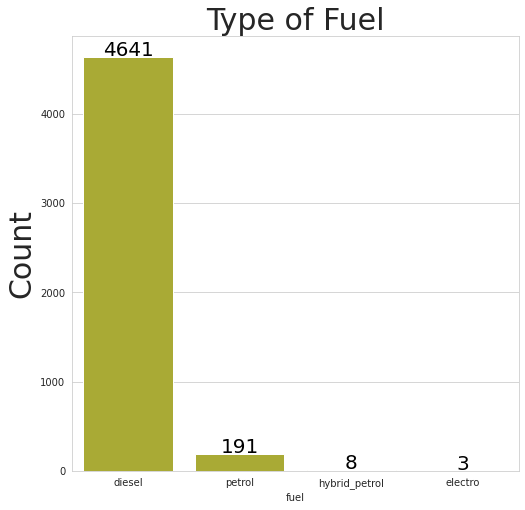

In [19]:
plt.figure(figsize=(8,8))
base_color=sns.color_palette()[8]
sns.countplot(data=data, x='fuel',color=base_color)
plt.title('Type of Fuel',fontsize=30)
plt.ylabel('Count',fontsize=30)
#plt.xlabel(fontsize=40)

locs, labels = plt.xticks()


# loop through each pair of locations and labels
for loc, label in zip(locs, labels):

    # get the text property for the label to get the correct count
    count = data['fuel'].value_counts()[label.get_text()]
    pct_string = '{:}'.format(count)

    # print the annotation just below the top of the bar
    plt.text(loc, count+10, pct_string, ha = 'center', color = 'black',fontsize=20)

## Fuel Distribution with respect to price 

(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

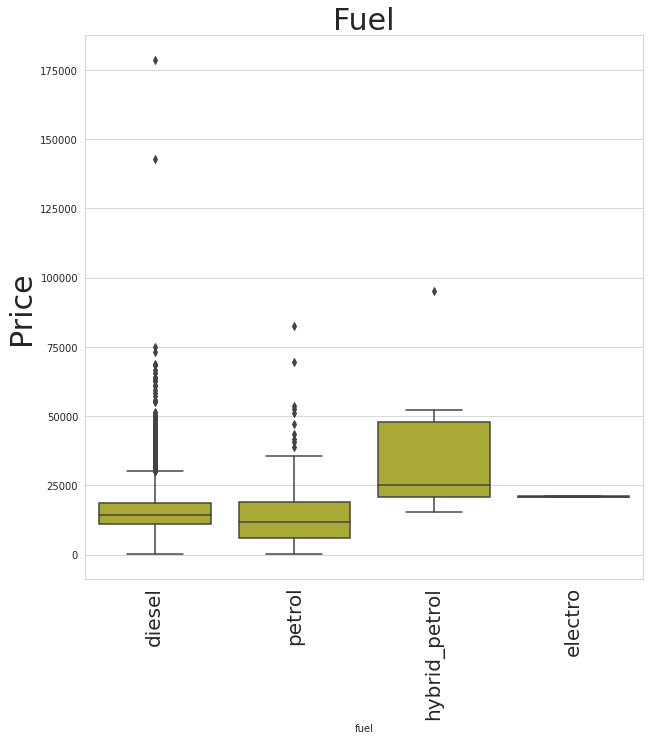

In [20]:
plt.figure(figsize=(10,10))
sns.boxplot(data=data,x='fuel',y='price',color=base_color,order=data.fuel.value_counts().index);
plt.title('Fuel',fontsize=30)
plt.ylabel('Price',fontsize=30)
plt.xticks(fontsize=20,rotation=90)

# Even though the diesel car are more in number we see that hybrid_Petrol sell at a higher price followed by diesel 

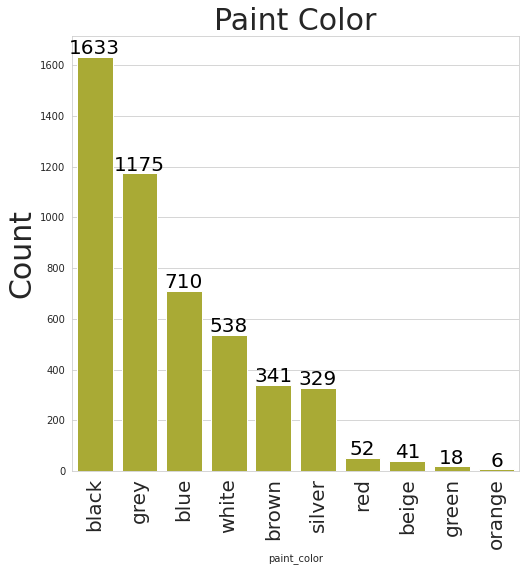

In [21]:
plt.figure(figsize=(8,8))
base_color=sns.color_palette()[8]
sns.countplot(data=data, x='paint_color',color=base_color,order=data.paint_color.value_counts().index)
plt.title('Paint Color',fontsize=30)
plt.ylabel('Count',fontsize=30)
plt.xticks(rotation=90,fontsize=20)

locs, labels = plt.xticks()


# loop through each pair of locations and labels
for loc, label in zip(locs, labels):

    # get the text property for the label to get the correct count
    count = data['paint_color'].value_counts()[label.get_text()]
    pct_string = '{:}'.format(count)

    # print the annotation just below the top of the bar
    plt.text(loc, count+10, pct_string, ha = 'center', color = 'black',fontsize=20)

## Not all paint colors are equally distributed in the dataset 

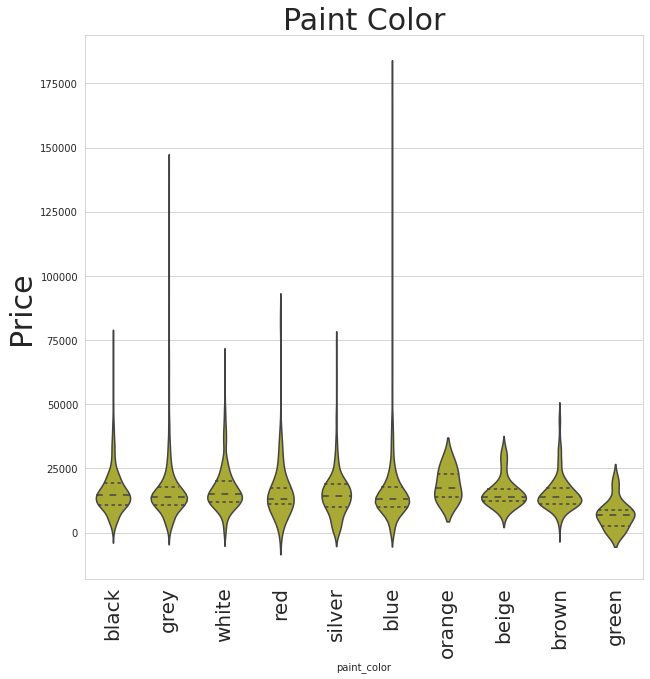

In [22]:
#Relation of Color with respect to price in the resale market . The data is has more points for black , grey and blue

plt.figure(figsize=(10,10));
sns.violinplot(data=data,x='paint_color',y='price',inner='quartile',color=base_color);
plt.ylabel('Price',fontsize=30);
#plt.xlabel('Paint Color',fontsize=30);
plt.title("Paint Color",fontsize=30);
plt.xticks(rotation=90,fontsize=20);

## We see that color is not a big factor in determining the final price of the BMW sold . As first six plot on the above graph show almost the same quartile ranges. So while fitting a neural network model I will drop the feature from the dataset 

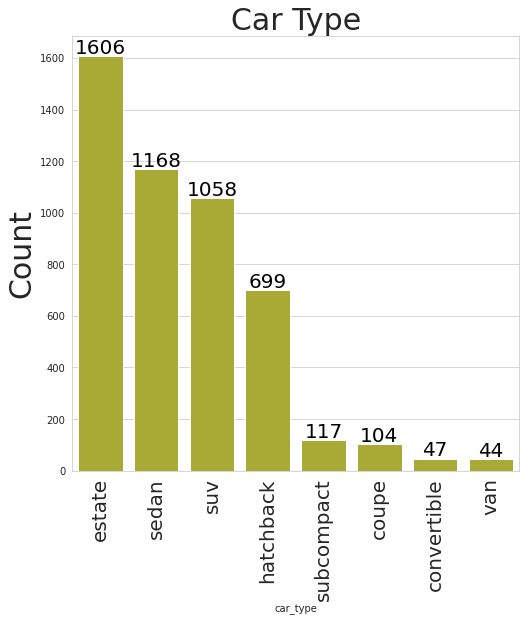

In [23]:
plt.figure(figsize=(8,8))
base_color=sns.color_palette()[8]
sns.countplot(data=data, x='car_type',color=base_color,order=data.car_type.value_counts().index)
plt.title('Car Type',fontsize=30)
plt.ylabel('Count',fontsize=30)
plt.xticks(rotation=90,fontsize=20)

locs, labels = plt.xticks()


# loop through each pair of locations and labels
for loc, label in zip(locs, labels):

    # get the text property for the label to get the correct count
    count = data['car_type'].value_counts()[label.get_text()]
    pct_string = '{:}'.format(count)

    # print the annotation just below the top of the bar
    plt.text(loc, count+10, pct_string, ha = 'center', color = 'black',fontsize=20)

## Relationship of Car types with respect to against price

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text major ticklabel objects>)

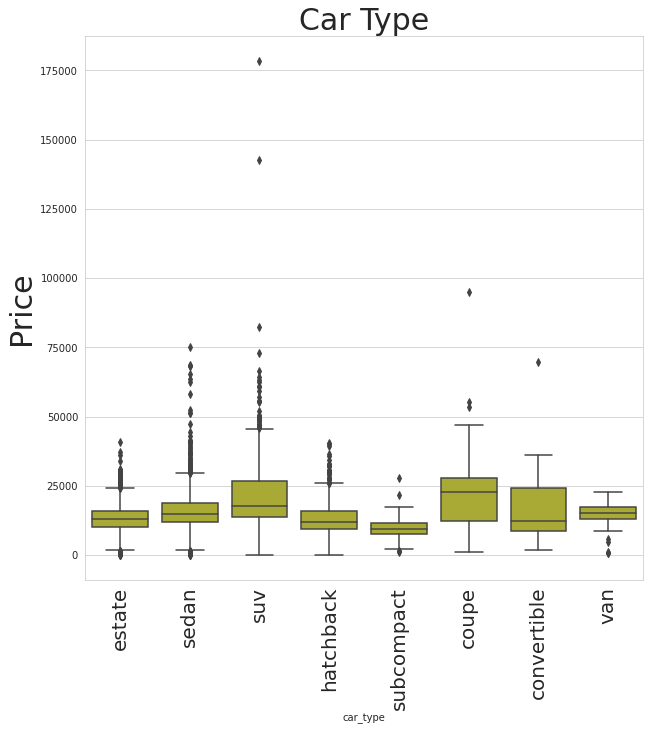

In [24]:
plt.figure(figsize=(10,10))
sns.boxplot(data=data,x='car_type',y='price',color=base_color,order=data.car_type.value_counts().index);
plt.title('Car Type',fontsize=30)
plt.ylabel('Price',fontsize=30)
plt.xticks(fontsize=20,rotation=90)

## SUV and coupe show higher median price over other types 

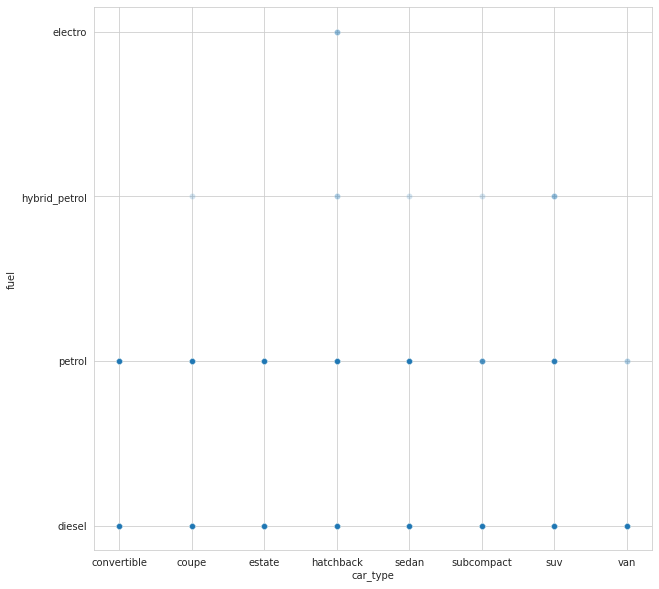

In [25]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=data,x='car_type',y='fuel',alpha=0.2,x_jitter=0.2);

## To add another column to the datafame called vechile_days which is the difference of time in days between registration_date and sold_at columns

In [26]:
#Creating a colum called as registration year 
data['registration_year']=data['registration_date'].dt.year

## Distribution of time frame 

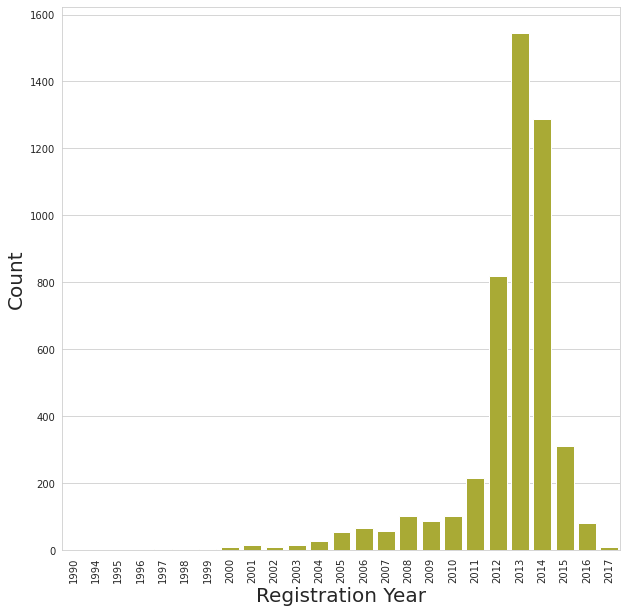

In [27]:
plt.figure(figsize=(10,10));
sns.countplot(data=data,x='registration_year',color=base_color);
plt.xticks(rotation=90);
plt.xlabel('Registration Year',fontsize=20);
plt.ylabel('Count',fontsize=20);

In [28]:
data['sold_at'].dt.year.value_counts()

2018    4843
Name: sold_at, dtype: int64

## There is only one year for the sold at columns 

## Relationship of price with respect to year 

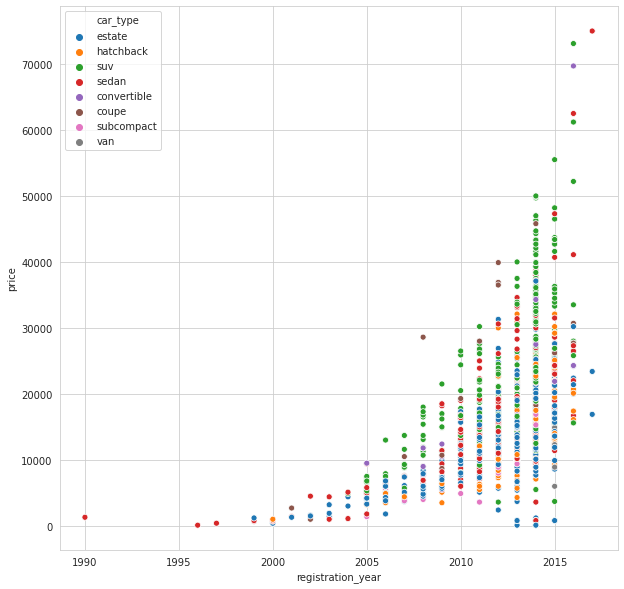

In [29]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=data.sample(2000),x='registration_year',y='price',hue='car_type');

## We can also see which car types where brought in which year 

In [30]:
data.dtypes

maker_key                    object
model_key                    object
mileage                       int64
engine_power                  int64
registration_date    datetime64[ns]
fuel                         object
paint_color                  object
car_type                     object
feature_1                      bool
feature_2                      bool
feature_3                      bool
feature_4                      bool
feature_5                      bool
feature_6                      bool
feature_7                      bool
feature_8                      bool
price                         int64
sold_at              datetime64[ns]
registration_year             int64
dtype: object

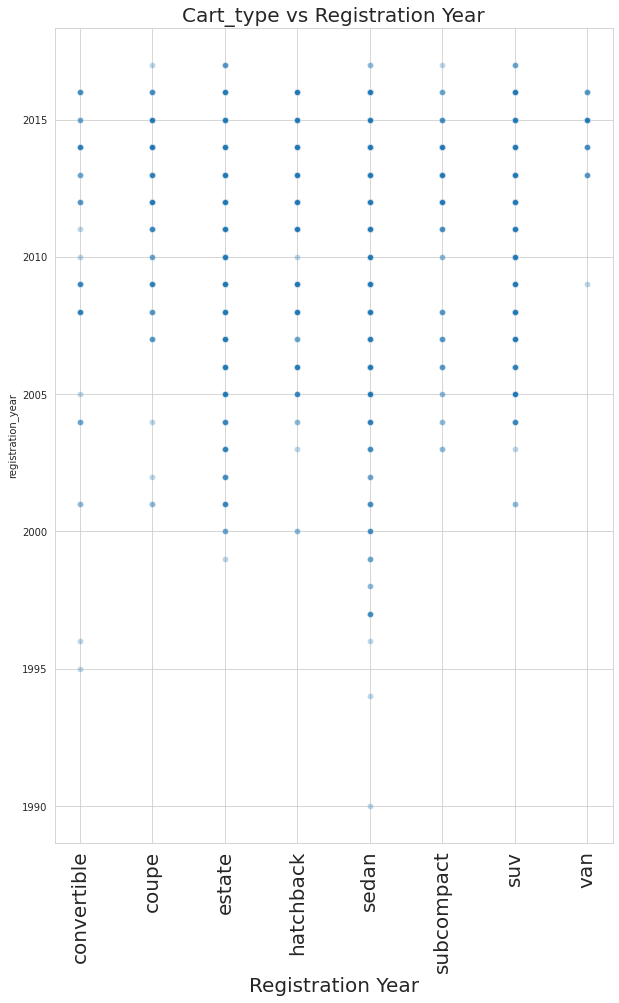

In [31]:
plt.figure(figsize=(10,15));
sns.scatterplot(data=data,x='car_type',y='registration_year',alpha=0.3);
plt.xticks(rotation=90,fontsize=20);
plt.xlabel('Car Type',fontsize=20);
plt.xlabel('Registration Year',fontsize=20);
plt.title('Cart_type vs Registration Year',fontsize=20);

## We see mostly a positive corelation between the year and price 

In [32]:
 data['vechile_days']=data['sold_at']-data['registration_date']
data['year_diff']=data['sold_at'].dt.year-data['registration_year']

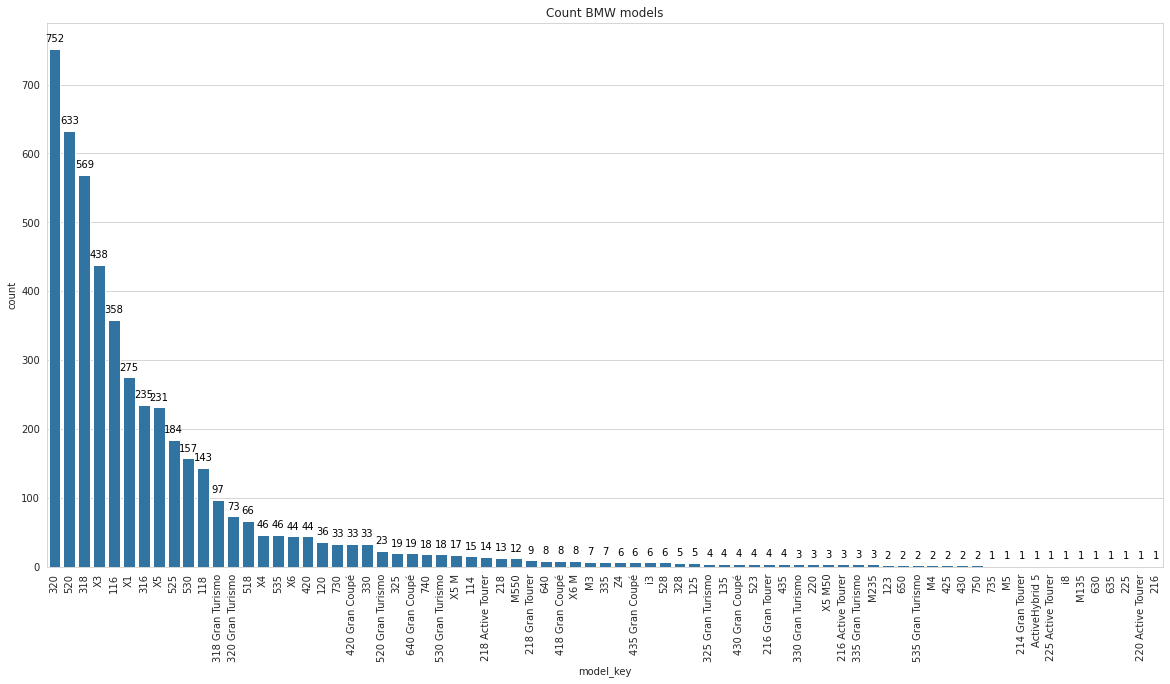

In [33]:
plt.figure(figsize=(20,10))
color=sns.color_palette()[0]
sns.countplot(data=data,x='model_key',color=color,order=data.model_key.value_counts().index);
plt.xticks(rotation=90);
plt.title('Count BMW models');

locs, labels = plt.xticks() # get the current tick locations and labels

# loop through each pair of locations and labels
for loc, label in zip(locs, labels):

    # get the text property for the label to get the correct count
    count = data.model_key.value_counts()[label.get_text()]
    pct_string = '{:}'.format(count)

    # print the annotation just below the top of the bar
    plt.text(loc, count+10, pct_string, ha = 'center', color = 'black')

## Most cars sold are 3 series like ( 320,318,X3,318) followed by 5 series 

Text(0.5, 0, 'CarType')

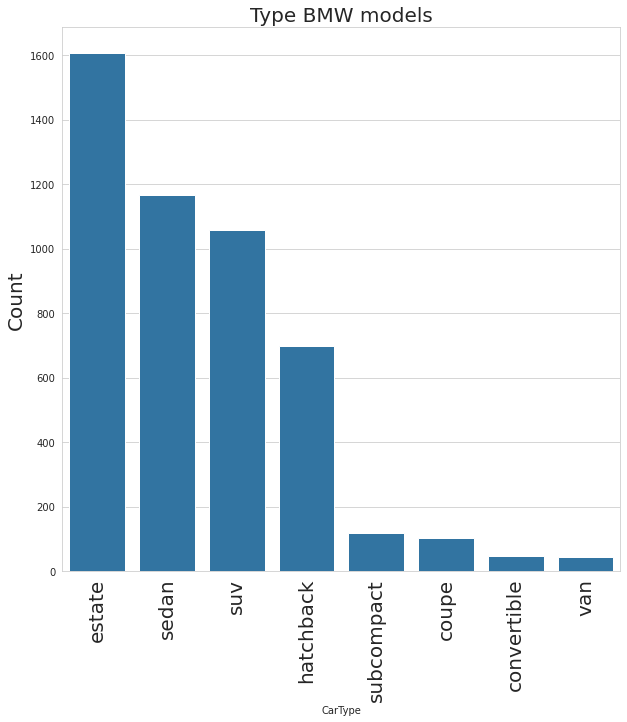

In [34]:
plt.figure(figsize=(10,10))
color=sns.color_palette()[0]
sns.countplot(data=data,x='car_type',color=color,order=data.car_type.value_counts().index);
plt.xticks(rotation=90,fontsize=20);
plt.title('Type BMW models',fontsize=20);
plt.ylabel('Count',fontsize=20);
plt.xlabel("CarType")

## Most cars sold are estate followed by sedans and suv

Text(0, 0.5, 'Number of Engines')

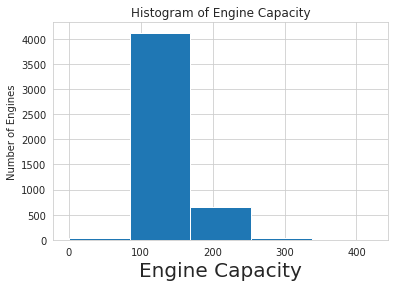

In [35]:
plt.hist(data=data,x='engine_power',bins=5);
plt.xlabel('Engine Capacity',fontsize=20);
plt.title('Histogram of Engine Capacity');
plt.ylabel('Number of Engines')

## Most cars are between 100 and 150 HP 

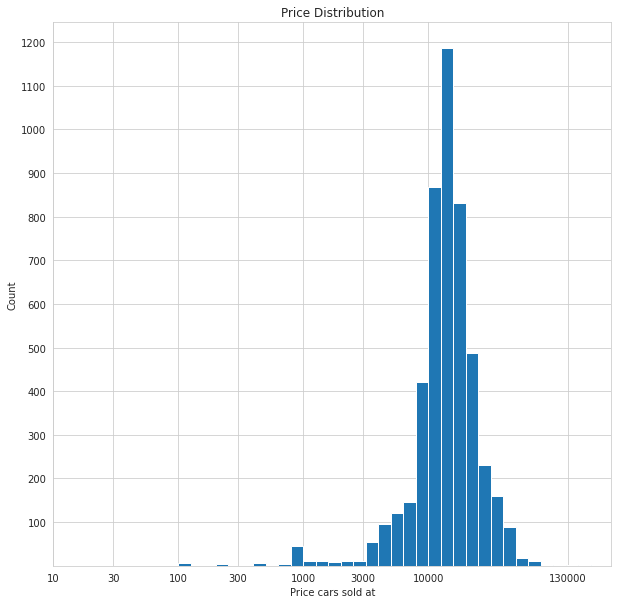

In [36]:
plt.figure(figsize=(10,10))
bin_edges = 10 ** np.arange(np.log10(data.price.min()), np.log10(data.price.max())+0.1, 0.1);
plt.hist(data=data,x='price',bins=bin_edges);
plt.xscale('log');
tick_locs = [10, 30, 100, 300, 1000, 3000,10000,130000];
ticks=np.arange(100,1300,100);
plt.xticks(tick_locs, tick_locs);
plt.yticks(ticks,ticks)
plt.xlabel('Price cars sold at');
plt.title('Price Distribution');
plt.ylabel('Count');

In [37]:
data.head()

,maker_key,model_key,mileage,engine_power,registration_date,fuel,paint_color,car_type,feature_1,feature_2,...,feature_4,feature_5,feature_6,feature_7,feature_8,price,sold_at,registration_year,vechile_days,year_diff
0,BMW,118,140411,100,2012-02-01,diesel,black,convertible,True,True,...,False,True,True,True,False,11300,2018-01-01,2012,2161 days,6
1,BMW,M4,13929,317,2016-04-01,petrol,grey,convertible,True,True,...,False,False,True,True,True,69700,2018-02-01,2016,671 days,2
2,BMW,320,183297,120,2012-04-01,diesel,white,convertible,False,False,...,False,True,False,True,False,10200,2018-02-01,2012,2132 days,6
3,BMW,420,128035,135,2014-07-01,diesel,red,convertible,True,True,...,False,True,True,True,True,25100,2018-02-01,2014,1311 days,4
4,BMW,425,97097,160,2014-12-01,diesel,silver,convertible,True,True,...,False,False,True,True,True,33400,2018-04-01,2014,1217 days,4


## Relationship of mileage with respect to price.


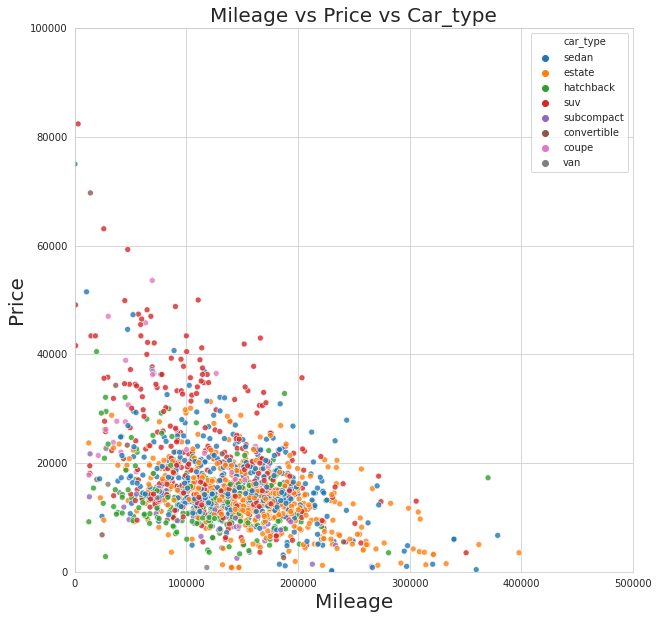

In [38]:
# Plotting a subsample of the data ( 1500 points ) to prevent over crowding . But we can see a some what negative trend in price as mileage increase 

plt.figure(figsize=(10,10));
sns.scatterplot(data=data.sample(1500),x='mileage',y='price',alpha=0.8,hue='car_type');
plt.xlim(0,500000)
plt.ylim(0,100000)
plt.xlabel('Mileage',fontsize=20);
plt.ylabel('Price',fontsize=20);
plt.title('Mileage vs Price vs Car_type',fontsize=20);

## For similar mileage SUV command higher price and hatchbacks among the lowest


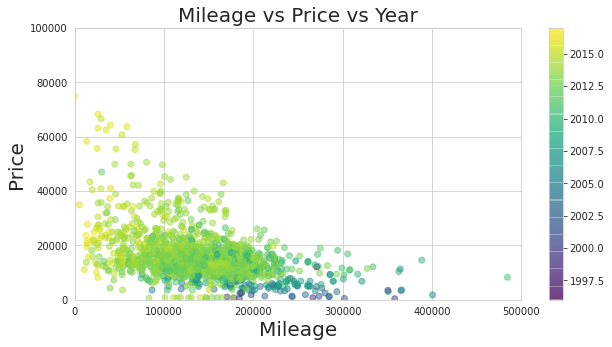

In [39]:
plt.figure(figsize=(10,5))
plt.scatter(data = data.sample(1500), x = 'mileage', y = 'price', c = 'registration_year',cmap='viridis',alpha=0.5)
plt.colorbar();
plt.xlim(0,500000)
plt.ylim(0,100000)
plt.xlabel('Mileage',fontsize=20);
plt.ylabel('Price',fontsize=20);
plt.title('Mileage vs Price vs Year',fontsize=20);

## As expected newer cars have low mileage and hence a higher prices . Also By removing the xlim we see that there are very few model which are above 500,000 mileage and 100000 price range so thinking of removing them from the prediction model 

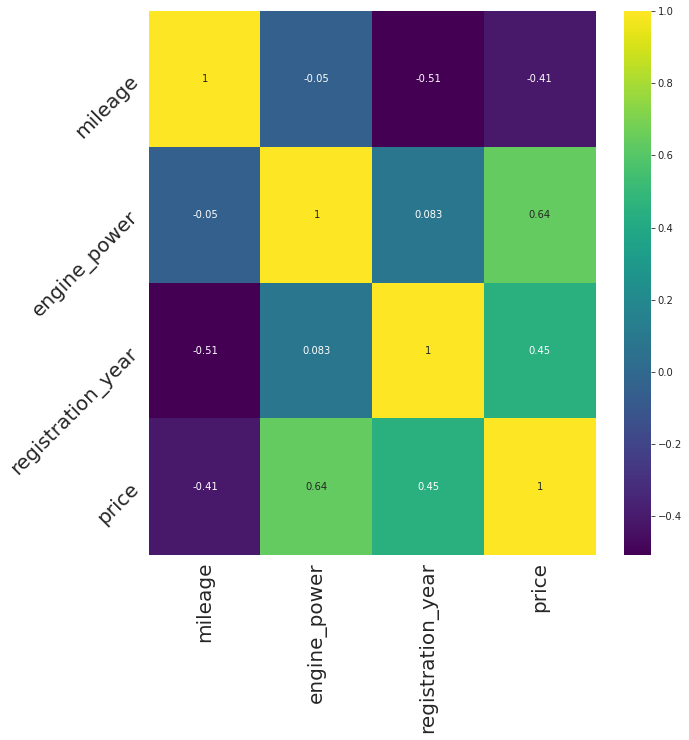

In [40]:
plt.figure(figsize=(10,10))
var=['mileage','engine_power','registration_year','price']
sns.heatmap(data[var].corr(),annot=True,cmap='viridis');
plt.xticks(fontsize=20,rotation=90);
plt.yticks(fontsize=20,rotation=45);

## We see that price variable has a decent correlation with the other quantitative variables shown above 

## Building a basic ANN model which takes into account only the 8 features into acount and avoiding everthing else .



In [1]:
# Fitting a neural network to only 8 boolean features 
baseline=data[['feature_1','feature_2','feature_3','feature_4','feature_5','feature_6','feature_7','feature_8','price']]

#Casting True/Fasle to 1/0 
baseline['feature_1']=baseline['feature_1'].astype('int')
baseline['feature_2']=baseline['feature_2'].astype('int')
baseline['feature_3']=baseline['feature_3'].astype('int')
baseline['feature_4']=baseline['feature_4'].astype('int')
baseline['feature_5']=baseline['feature_5'].astype('int')
baseline['feature_6']=baseline['feature_6'].astype('int')
baseline['feature_7']=baseline['feature_7'].astype('int')
baseline['feature_8']=baseline['feature_8'].astype('int')

columns_names=baseline.columns

#Scaling the dataframe 
sc = StandardScaler()
baseline = sc.fit_transform(baseline[columns_names])

#converting it back to dataframe 
baseline_scaled=pd.DataFrame(baseline,columns=columns_names)
X=baseline_scaled.drop(['price'],axis=1).values
y=baseline_scaled['price'].values.reshape(len(X),1)

print(X.shape,y.shape)

# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state =42)

## Baseline Model1


In [43]:
# Initialising the ANN
model_baseline = Sequential()

# Adding the input layer and the first hidden layer
model_baseline.add(Dense(units = 5, kernel_initializer = 'he_normal', activation = 'relu', input_dim = X.shape[1]))

# Adding the second hidden layer
model_baseline.add(Dense(units = 5, kernel_initializer = 'he_normal', activation = 'relu'))

# Adding the output layer
model_baseline.add(Dense(units = 1, kernel_initializer = 'he_normal', activation = 'linear'))

# Compiling the ANN

sgd = optimizers.SGD(lr=0.001, decay=1e-6, momentum=0.9, nesterov=True)
model_baseline.compile(optimizer =sgd, loss = 'mean_squared_error',metrics=['MAE'])

# Fitting the ANN to the Training set
model_baseline.fit(X_train, y_train,validation_data=(X_test,y_test) , batch_size = 128, epochs = 500,verbose=0)

predictions=model_baseline.predict(X_test)


In [44]:
model_baseline.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 5)                 45        
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 30        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 6         
Total params: 81
Trainable params: 81
Non-trainable params: 0
_________________________________________________________________


In [45]:
print('Explained_varianve_score={}'.format( explained_variance_score(y_test,predictions)))
print('R-squared={}'.format( r2_score(y_test,predictions)))

Explained_varianve_score=0.38027691273358943
R-squared=0.37993765090780607


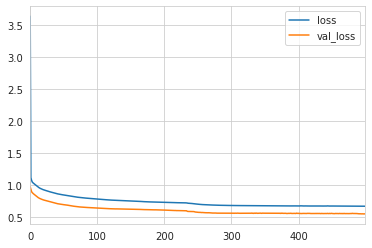

In [46]:
losses = pd.DataFrame(model_baseline.history.history)
losses[['loss','val_loss']].plot()

## Model 2 Features selection Based

In [47]:
# Model 2
# Selecting the features below for fitting the price model .
# Dropping the fuel type as it is screwed towards the diseal fuel 
# Also dropping maker_key as its all BMW  and model_key as that is captured in car_type 

data=data[data.price<100000] # Removing price outliers 
data=data[data.mileage<400000] #Removing mileage outliers . In total 8 rows removed 

features=data[['mileage','engine_power','paint_color','car_type','feature_1','feature_2','feature_3','feature_4','feature_5','feature_6','feature_7','feature_8','price','vechile_days']]

#Creating Dummy Variables 
features=pd.get_dummies(features,drop_first=True)


features['vechile_days']=features['vechile_days'].astype('int')
features['feature_1']=features['feature_1'].astype('int')
features['feature_2']=features['feature_2'].astype('int')
features['feature_3']=features['feature_3'].astype('int')
features['feature_4']=features['feature_4'].astype('int')
features['feature_5']=features['feature_5'].astype('int')
features['feature_6']=features['feature_6'].astype('int')
features['feature_7']=features['feature_7'].astype('int')
features['feature_8']=features['feature_8'].astype('int')

columns_names=features.columns

sc = StandardScaler()
features = sc.fit_transform(features[columns_names])

#converting it back to dataframe 
features_scales=pd.DataFrame(features,columns=columns_names)
X=features_scales.drop(['price'],axis=1).values
y=features_scales['price'].values.reshape(len(X),1)

# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state =42)


In [48]:
print(X.shape,y.shape)

(4835, 27) (4835, 1)


In [49]:
# Initialising the ANN
model = Sequential()

# Adding the input layer and the first hidden layer
model.add(Dense(units = 12, kernel_initializer = 'he_normal', activation = 'relu', input_dim = X.shape[1]))

# Adding the second hidden layer
model.add(Dense(units = 12, kernel_initializer = 'he_normal', activation = 'relu'))

# Adding the output layer
model.add(Dense(units = 1, kernel_initializer = 'he_normal', activation = 'linear'))

# Compiling the ANN

sgd = optimizers.SGD(lr=0.001, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(optimizer =sgd, loss = 'mean_squared_error',metrics=['MAE'])

# Fitting the ANN to the Training set
model.fit(X_train, y_train,validation_data=(X_test,y_test) , batch_size = 128, epochs = 350,verbose=0)

In [50]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 12)                336       
_________________________________________________________________
dense_5 (Dense)              (None, 12)                156       
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 13        
Total params: 505
Trainable params: 505
Non-trainable params: 0
_________________________________________________________________


In [51]:
predictions=model.predict(X_test)
print('Explained_varianve_score={}'.format( explained_variance_score(y_test,predictions)))
print('R-squared={}'.format( r2_score(y_test,predictions)))

Explained_varianve_score=0.8140437539218642
R-squared=0.813497325369691


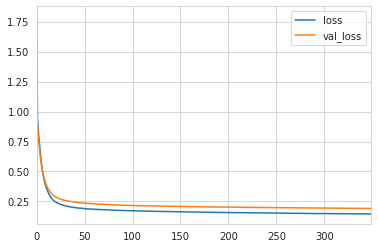

In [52]:
losses = pd.DataFrame(model.history.history)
losses[['loss','val_loss']].plot()

In [ ]:
#Saving weights for this model 
weights = model.get_weights()

In [ ]:
errors = y_test - predictions
sns.distplot(errors)

In [ ]:
# Our predictions
plt.figure(figsize=(8,8));
plt.scatter(y_test,predictions,alpha=0.3);

# Perfect predictions
plt.plot(y_test,y_test,'r');

## Predictive Analysis

# How much impact does each of features have on the estimate value of the car?

It very difficult to assign value of each individual feature but from the Model 1 ANN which takes into account the 8 boolean feature we where able to explain only 40% of the variance in price.  But the current model (Model 2) can capture 83% of variance in the model .So it would be safe to conclude that the 8 unknown boolean features can explain ~40% variation in price 



# Some of the patterns we could draw form the dataset are as follows 

* Diesel was the most common type of fuel in the cars which where sold 
* Even though the diesel car are more in number we see that hybrid_Petrol sell at a higher price followed by diesel 
* We see that color is not a big factor in determining the final price of the BMW sold .
* Estate cars are more in numbers in the data set followed by Sedan . Looking the car type I feel this data might be collected in EMEA (Europe) region <br>
* We see that SUV and coupe show higher median price over other types of cars 
* Most cars where purchased in 2013 and 2014 and sold/acutioned off in 2018 
* SUV command a higher price in each year 
* Most cars have engine between 100 and 150 HP.Overall engine range is from 0-450HP 
* For a similar mileage value SUV command a higher price over other models 
* We see that the range of price variable is pretty large but most of the cars sold lie between 10,000 to 19000 price range 
* Inter quartile for mileage is 100,000 to 175,000
* Sedans where most earlier car registered followed by estats and SUV but of late not many sedans are being registered 



# Result

***Built BMW Used Car's price model using Deep Learning-ANN technique with 83% R-Square. And created Web app GUI at Gradio. Also, Explore the Data and analyzed the patterns among the Data***